<a href="https://colab.research.google.com/github/AndreMoreira00/Linguagem-Natural/blob/main/Classificacao_de_Sentimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
! pip install spacy --upgrade
! pip install spacy==2.3.5
! python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 17.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached thinc-7.4.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (23 kB)
  Using cached wasabi-0.10.1-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-1.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
  Using cached catalogue-1.0.2-py2.py3-none-any.whl.metadata (13 kB)
  Using cached plac-1.1.3-py2.py3-none-any.whl.metadata (2.3 kB)
Using cached catalogue-1.0.2-py2.py3-none-any.whl (16 kB)
Using cached plac-1.1.3-py2.py3-none-any.whl (20 kB)
Using cached srsly-1.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (369 kB)
Using cached thinc-7.4.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
Using cached wasabi-0.10.1-py3-none-any.whl (26 kB)
  error: subprocess-exited-with-er

In [209]:
import pandas as pd
import spacy
import string
import random
import seaborn as sns
import numpy as np

# Carregar dados

In [210]:
base_dados = pd.read_csv('/content/base_treinamento.txt', encoding='utf-8')

In [211]:
base_dados.shape

(196, 2)

In [212]:
base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [213]:
base_dados.tail()

,texto,emocao
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo
195,isso me apavora,medo


<Axes: xlabel='count', ylabel='emocao'>

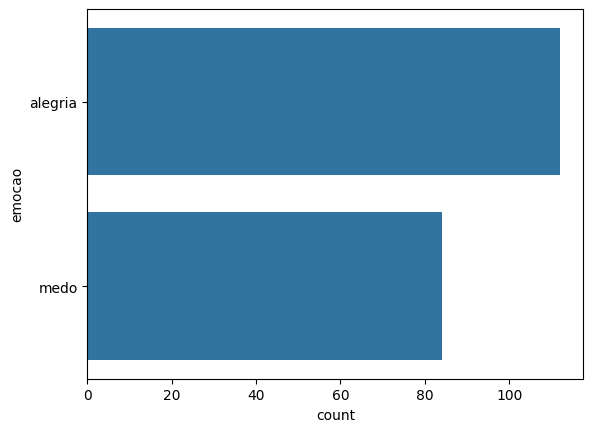

In [214]:
sns.countplot(base_dados['emocao'], label='Contagem')

# Função de pré-processamento dos textos

In [215]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [216]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [217]:
print(stop_words)

{'tendes', 'menos', 'desde', 'minha', 'comprido', 'eu', 'tarde', 'novos', 'primeira', 'menor', 'foi', 'corrente', 'tentar', 'estar', 'nova', 'quarta', 'parte', 'valor', 'desta', 'falta', 'diante', 'parece', 'aos', 'estiveste', 'já', 'vinda', 'estiveram', 'aqueles', 'des', 'porquê', 'inicio', 'através', 'saber', 'este', 'aquela', 'outras', 'fazemos', 'tuas', 'ao', 'das', 'os', 'caminho', 'esta', 'sexto', 'tanto', 'do', 'nenhuma', 'outros', 'terceiro', 'vais', 'estivestes', 'posso', 'dois', 'põem', 'todos', 'dezanove', 'vez', 'dezoito', 'próxima', 'neste', 'bastante', 'conselho', 'obrigado', 'sem', 'disso', 'o', 'esteve', 'relação', 'quieta', 'porquanto', 'enquanto', 'para', 'fora', 'tens', 'momento', 'vêm', 'mil', 'estás', 'às', 'você', 'nunca', 'apoio', 'forma', 'acerca', 'também', 'devem', 'questão', 'à', 'tais', 'quanto', 'cinco', 'outra', 'tivestes', 'tal', 'numa', 'maior', 'dizer', 'esse', 'tua', 'poder', 'conhecido', 'usa', 'meses', 'teus', 'sou', 'deve', 'a', 'sete', 'favor', 'ma

In [218]:
pln = spacy.load('pt_core_news_sm')

In [219]:
pln

In [220]:
def preprocessamento(texto):
  texto = texto.lower()
  documento = pln(texto)
  lista = []
  for token in documento:
    # lista.append(token.text)
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [221]:
teste = preprocessamento('Estou aprendendo processamento de Linguagem natural')
teste

'aprender processamento linguagem natural'

# Limpeza dos dados

In [222]:
base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [223]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)

In [224]:
base_dados.head(10)

,texto,emocao
0,trabalho agradável,alegria
1,gosto ficar em o aconchego,alegria
2,fiz adesão a o curso hoje,alegria
3,admirar,alegria
4,adorar,alegria
5,adorar cabelo macio,alegria
6,adorar cor de o olho,alegria
7,somo amável outro,alegria
8,sinto afeição,alegria
9,querer agradar filho,alegria


# Tratamento da classe

In [225]:
base_dados_final = []
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
  # print(texto, emocao)
  if emocao == 'alegria':
    dic = ({'ALEGRIA':True, 'MEDO':False})
  elif emocao == 'medo':
    dic = ({'ALEGRIA':False, 'MEDO':True})

  base_dados_final.append([texto, dic.copy()])

In [226]:
len(base_dados_final)

196

In [227]:
base_dados_final[0]

['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}]

# Criação do Classificador

In [250]:
modelo = spacy.blank('pt')
categorias = modelo.create_pipe("textcat")

In [251]:
categorias.add_label("ALEGRIA")

1

In [252]:
categorias.add_label("MEDO")

1

In [253]:
categorias.labels

('ALEGRIA', 'MEDO')

In [256]:
modelo.add_pipe("textcat")
historico = []

In [257]:
modelo.pipe_names

['textcat']

In [258]:
modelo.begin_training()
for epoca in range(1000):
  random.shuffle(base_dados_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_final, 30):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    modelo.update(textos, annotations, losses=losses)
  if epoca % 100 == 0:
    print(losses)
    historico.append(losses)

ValueError: [E867] The 'textcat' component requires at least two labels because it uses mutually exclusive classes where exactly one label is True for each doc. For binary classification tasks, you can use two labels with 'textcat' (LABEL / NOT_LABEL) or alternatively, you can use the 'textcat_multilabel' component with one label.